<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/Serie%26TransformadaDeFourier./S%26S%3ATaller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

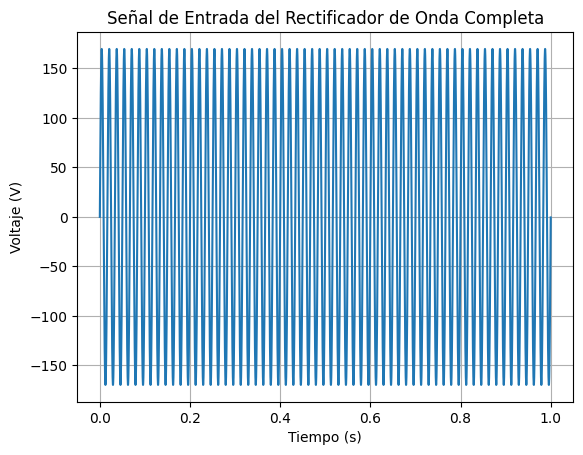

In [4]:
#Ejercicio1

import numpy as np
import matplotlib.pyplot as plt

frecuencia=60
voltaje_rms=120
resistencia_carga=10

#Generar la señal de entrada (onda sinusoidal):

t=np.arange(0, 1, 1/(2*frecuencia*1000))
entrada=voltaje_rms*np.sqrt(2)*np.sin(2*np.pi*frecuencia*t)

#Graficar la señal de entrada:

plt.plot(t, entrada)
plt.title('Señal de Entrada del Rectificador de Onda Completa')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()

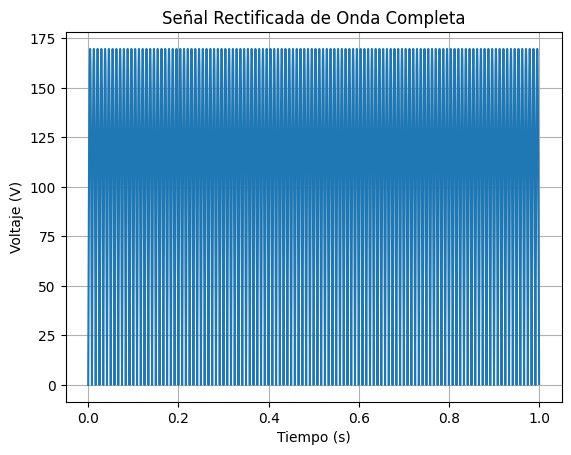

In [5]:
#Rectificación de la onda completa:

rectificado=np.abs(entrada)

#Graficar la señal rectificada:

plt.plot(t, rectificado)
plt.title('Señal Rectificada de Onda Completa')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()

In [6]:
from scipy.fft import fft

#Calcular la FFT de la señal rectificada:

fft_result=fft(rectificado)

#Calcular el THD:

fundamental=fft_result[1]
armónicos=np.delete(fft_result, 1)
energia_fundamental=np.abs(fundamental)**2
energia_armónicos=np.sum(np.abs(armónicos)**2)
thd=np.sqrt(energia_armónicos)/np.sqrt(energia_fundamental)

#Calcular el factor de distorsión de potencia (PFD):

pfd=thd/np.sqrt(1+thd**2)

#Imprimir resultados:

print(f'THD: {thd * 100:.2f}%')
print(f'Factor de Distorsión de Potencia (PFD): {pfd:.4f}')

THD: 1672685258254522880.00%
Factor de Distorsión de Potencia (PFD): 1.0000


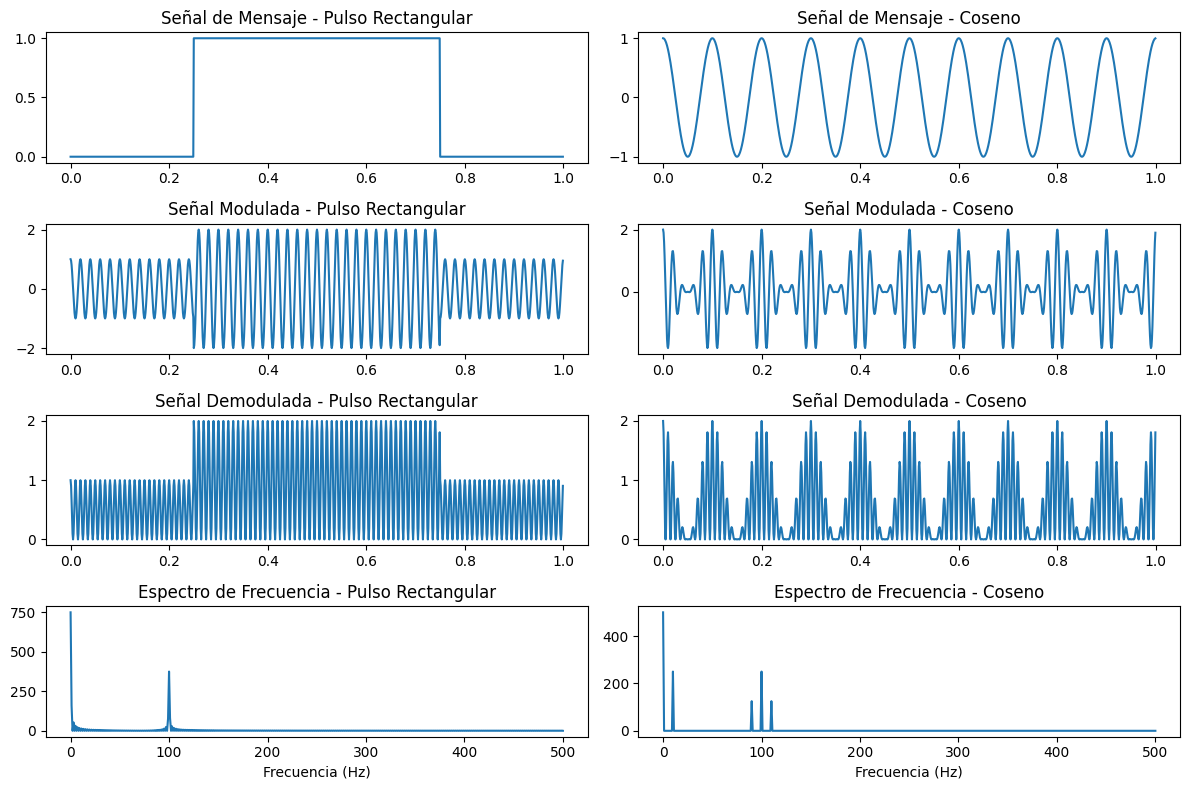

In [7]:
#Ejercicio2

import numpy as np
import matplotlib.pyplot as plt

t_muestreo=0.001 #Tiempo de muestreo
t=np.arange(0, 1, t_muestreo) #Vector de tiempo
fm_rectangular=5.0 #Frecuencia del pulso rectangular en Hz
fm_coseno=10.0 #Frecuencia de la señal tipo coseno en Hz

#Señales de mensaje:

mensaje_rectangular=np.zeros_like(t)
mensaje_rectangular[int(len(t)/4):int(3*len(t)/4)]=1.0 #Pulso rectangular
mensaje_coseno=np.cos(2*np.pi*fm_coseno*t) #Señal tipo coseno

#Señales moduladas en amplitud (AM):

Ac=1.0 #Amplitud de la portadora
fc=50.0 #Frecuencia de la portadora en Hz
portadora=Ac*np.cos(2*np.pi*fc*t)
señal_modulada_rectangular=(1+mensaje_rectangular)*portadora
señal_modulada_coseno=(1+mensaje_coseno)*portadora

#Detección coherente:

señal_demodulada_rectangular=señal_modulada_rectangular*portadora
señal_demodulada_coseno=señal_modulada_coseno*portadora
frecuencia=np.fft.rfftfreq(len(t), t_muestreo) #Transformada Rápida de Fourier
fft_rectangular=np.fft.rfft(señal_demodulada_rectangular)
fft_coseno=np.fft.rfft(señal_demodulada_coseno)

#Visualización en el dominio del tiempo:

plt.figure(figsize=(12, 8))
plt.subplot(4, 2, 1)
plt.plot(t, mensaje_rectangular)
plt.title('Señal de Mensaje - Pulso Rectangular')
plt.subplot(4, 2, 2)
plt.plot(t, mensaje_coseno)
plt.title('Señal de Mensaje - Coseno')
plt.subplot(4, 2, 3)
plt.plot(t, señal_modulada_rectangular)
plt.title('Señal Modulada - Pulso Rectangular')
plt.subplot(4, 2, 4)
plt.plot(t, señal_modulada_coseno)
plt.title('Señal Modulada - Coseno')
plt.subplot(4, 2, 5)
plt.plot(t, señal_demodulada_rectangular)
plt.title('Señal Demodulada - Pulso Rectangular')
plt.subplot(4, 2, 6)
plt.plot(t, señal_demodulada_coseno)
plt.title('Señal Demodulada - Coseno')

#Visualización en el dominio de la frecuencia:

plt.subplot(4, 2, 7)
plt.plot(frecuencia, np.abs(fft_rectangular))
plt.title('Espectro de Frecuencia - Pulso Rectangular')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(4, 2, 8)
plt.plot(frecuencia, np.abs(fft_coseno))
plt.title('Espectro de Frecuencia - Coseno')
plt.xlabel('Frecuencia (Hz)')
plt.tight_layout()
plt.show()